In [5]:
import imblearn as im
from sklearn.datasets import *
print(imblearn.__version__)

0.8.1


In [6]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [8]:
...
# summarize class distribution
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


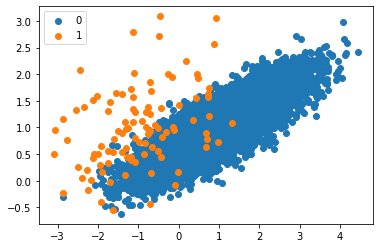

In [15]:
...
# scatter plot of examples by class label
from numpy import *
import matplotlib.pyplot as plt
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


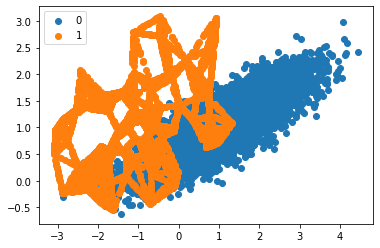

In [16]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


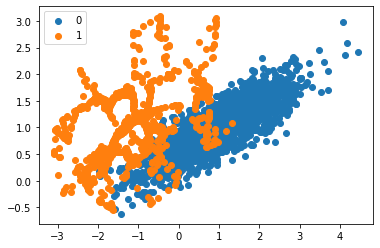

In [17]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [3]:
import os

base_dir = 'xray_data'

normal_dir = os.path.join(base_dir, '0')
car_dir = os.path.join(base_dir, '1') # cardiomegaly

print(normal_dir)
print(car_dir)

xray_data\0
xray_data\1


In [4]:
normal_fnames = os.listdir(normal_dir)
car_fnames = os.listdir(car_dir)

print(normal_fnames[:5])
print(car_fnames[:5])

['0417.jpg', '0418.jpg', '0419.jpg', '0422.jpg', '0425.jpg']
['0001a.jpg', '0001b.jpg', '0001c.jpg', '0002a.jpg', '0004a.jpg']


In [5]:
print('Total training normal images :', len(os.listdir(normal_dir)))
print('Total training car images :', len(os.listdir(car_dir)))

Total training normal images : 1753
Total training car images : 816


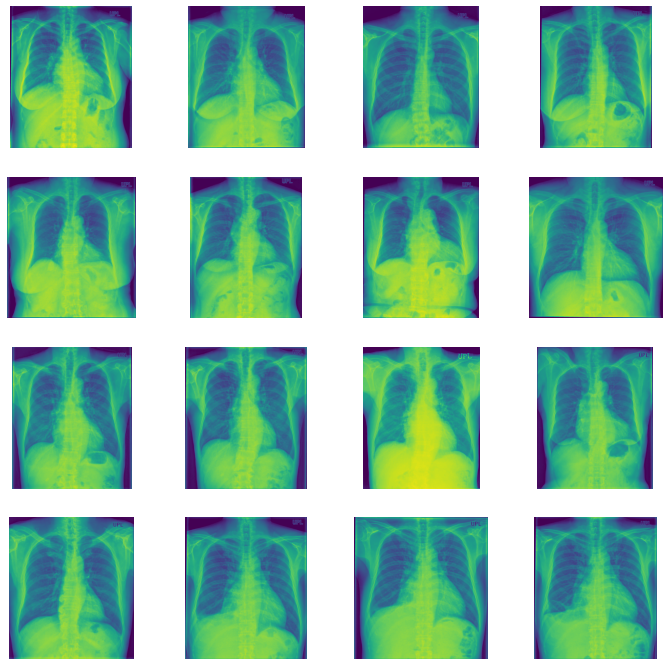

In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_normal_pix = [os.path.join(normal_dir, fname)
                for fname in normal_fnames[ pic_index-8:pic_index]]

next_car_pix = [os.path.join(car_dir, fname)
                for fname in car_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_normal_pix+next_car_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [10]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

C:\Users\qjsro\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(base_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))

validation_generator =  test_datagen.flow_from_directory(base_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2569 images belonging to 2 classes.
Found 2569 images belonging to 2 classes.


In [18]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_steps=50,
                    verbose=2)

Epoch 1/100
100/100 - 28s - loss: 0.5030 - accuracy: 0.7733 - val_loss: 0.5871 - val_accuracy: 0.7410 - 28s/epoch - 283ms/step
Epoch 2/100
100/100 - 27s - loss: 0.4286 - accuracy: 0.8069 - val_loss: 0.3274 - val_accuracy: 0.8550 - 27s/epoch - 266ms/step
Epoch 3/100
100/100 - 26s - loss: 0.3856 - accuracy: 0.8270 - val_loss: 0.3704 - val_accuracy: 0.8370 - 26s/epoch - 265ms/step
Epoch 4/100
100/100 - 26s - loss: 0.3680 - accuracy: 0.8431 - val_loss: 0.3097 - val_accuracy: 0.8680 - 26s/epoch - 264ms/step
Epoch 5/100
100/100 - 26s - loss: 0.3368 - accuracy: 0.8565 - val_loss: 0.3746 - val_accuracy: 0.8480 - 26s/epoch - 264ms/step
Epoch 6/100


KeyboardInterrupt: 

In [21]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

In [28]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.97], flip_y=0, random_state=1)

In [29]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9700, 1: 300})


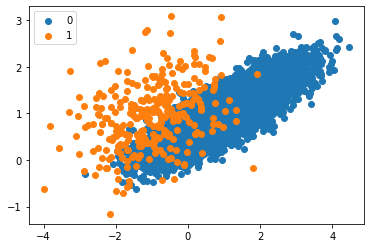

In [30]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [5]:
print(y)

[0 0 0 ... 0 0 0]


In [32]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [33]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 9700, 1: 9700})


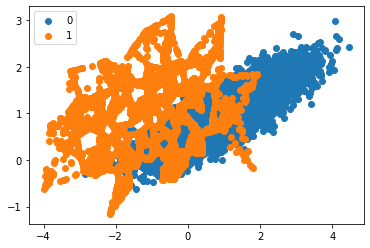

In [34]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 1940, 1: 970})


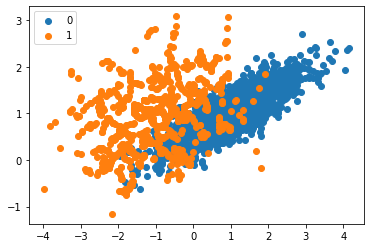

In [12]:
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [35]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define model
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.930


In [36]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.97], flip_y=0, random_state=1)
# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.849


In [37]:
# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.864


In [38]:
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = DecisionTreeClassifier()
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.855
> k=2, Mean ROC AUC: 0.861
> k=3, Mean ROC AUC: 0.862
> k=4, Mean ROC AUC: 0.866
> k=5, Mean ROC AUC: 0.872
> k=6, Mean ROC AUC: 0.870
> k=7, Mean ROC AUC: 0.866


Counter({0: 9700, 1: 300})
Counter({0: 9700, 1: 9700})


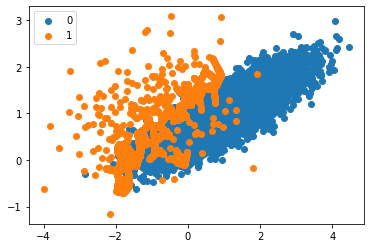

In [67]:
from imblearn.over_sampling import BorderlineSMOTE

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.97], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 9700, 1: 300})
Counter({0: 9700, 1: 9700})


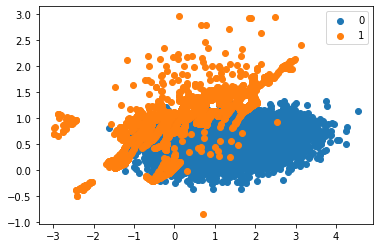

In [65]:
# borderline-SMOTE with SVM for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=7, n_redundant=5,
	n_clusters_per_class=1, weights=[0.97], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [76]:
import os


base_dir = 'xray_data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'normal')
train_dogs_dir = os.path.join(train_dir, 'cardiomegaly')
print(train_cats_dir)
print(train_dogs_dir)


validation_cats_dir = os.path.join(validation_dir, 'normal')
validation_dogs_dir = os.path.join(validation_dir, 'cardiomegaly')
print(validation_cats_dir)
print(validation_dogs_dir)

xray_data\train\normal
xray_data\train\cardiomegaly
xray_data\validation\normal
xray_data\validation\cardiomegaly


In [77]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['0417.jpg', '0418.jpg', '0419.jpg', '0422.jpg', '0425.jpg']
['0001a.jpg', '0001b.jpg', '0001c.jpg', '0002a.jpg', '0004a.jpg']


In [78]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1742
Total training dog images : 828
Total validation cat images : 1742
Total validation dog images : 828


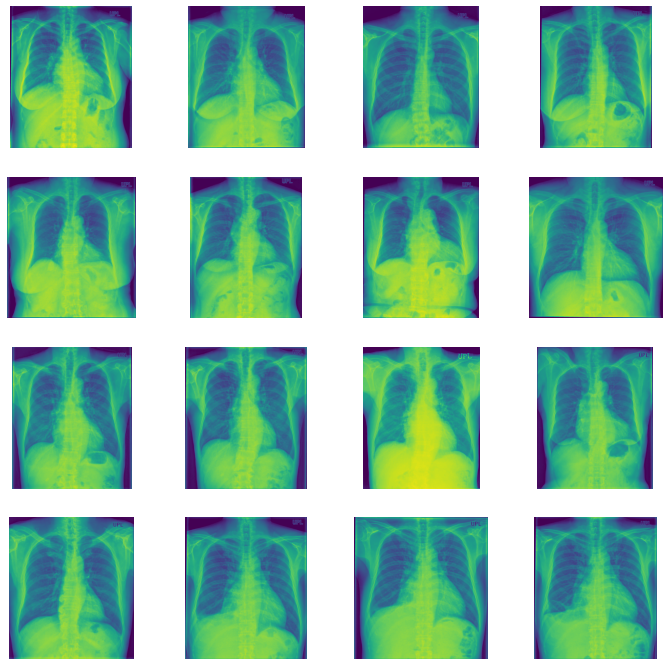

In [79]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [80]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [81]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

C:\Users\qjsro\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2569 images belonging to 2 classes.
Found 2569 images belonging to 2 classes.


In [83]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=10,
                    epochs=100,
                    validation_steps=5,
                    verbose=2)

Epoch 1/100
10/10 - 4s - loss: 0.9524 - accuracy: 0.4850 - val_loss: 0.6418 - val_accuracy: 0.6500 - 4s/epoch - 389ms/step
Epoch 2/100
10/10 - 3s - loss: 0.6060 - accuracy: 0.7300 - val_loss: 0.6339 - val_accuracy: 0.7500 - 3s/epoch - 304ms/step
Epoch 3/100
10/10 - 3s - loss: 0.7103 - accuracy: 0.7150 - val_loss: 0.6368 - val_accuracy: 0.6500 - 3s/epoch - 303ms/step
Epoch 4/100
10/10 - 3s - loss: 0.6345 - accuracy: 0.6750 - val_loss: 0.8995 - val_accuracy: 0.6100 - 3s/epoch - 311ms/step
Epoch 5/100
10/10 - 3s - loss: 0.6246 - accuracy: 0.6350 - val_loss: 0.6857 - val_accuracy: 0.5100 - 3s/epoch - 315ms/step
Epoch 6/100
10/10 - 3s - loss: 0.5573 - accuracy: 0.7300 - val_loss: 0.6935 - val_accuracy: 0.6600 - 3s/epoch - 309ms/step
Epoch 7/100
10/10 - 3s - loss: 0.6064 - accuracy: 0.6850 - val_loss: 0.6584 - val_accuracy: 0.5900 - 3s/epoch - 299ms/step
Epoch 8/100
10/10 - 3s - loss: 0.7202 - accuracy: 0.6950 - val_loss: 0.4984 - val_accuracy: 0.7200 - 3s/epoch - 306ms/step
Epoch 9/100
10/1

Epoch 68/100
10/10 - 3s - loss: 0.3675 - accuracy: 0.8350 - val_loss: 0.3206 - val_accuracy: 0.8600 - 3s/epoch - 280ms/step
Epoch 69/100
10/10 - 3s - loss: 0.2868 - accuracy: 0.8850 - val_loss: 0.2874 - val_accuracy: 0.9000 - 3s/epoch - 287ms/step
Epoch 70/100
10/10 - 3s - loss: 0.2989 - accuracy: 0.9000 - val_loss: 0.2035 - val_accuracy: 0.9300 - 3s/epoch - 279ms/step
Epoch 71/100
10/10 - 3s - loss: 0.2772 - accuracy: 0.8950 - val_loss: 0.2623 - val_accuracy: 0.8900 - 3s/epoch - 280ms/step
Epoch 72/100
10/10 - 3s - loss: 0.2412 - accuracy: 0.9048 - val_loss: 0.2626 - val_accuracy: 0.8800 - 3s/epoch - 270ms/step
Epoch 73/100
10/10 - 3s - loss: 0.1696 - accuracy: 0.9350 - val_loss: 0.3894 - val_accuracy: 0.8300 - 3s/epoch - 284ms/step
Epoch 74/100
10/10 - 3s - loss: 0.3069 - accuracy: 0.8836 - val_loss: 0.2563 - val_accuracy: 0.8900 - 3s/epoch - 274ms/step
Epoch 75/100
10/10 - 3s - loss: 0.2995 - accuracy: 0.8850 - val_loss: 0.2186 - val_accuracy: 0.9300 - 3s/epoch - 283ms/step
Epoch 76

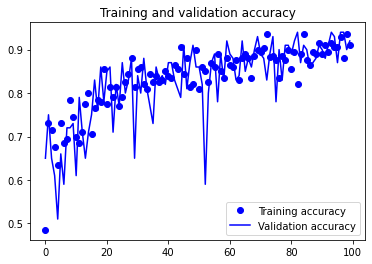

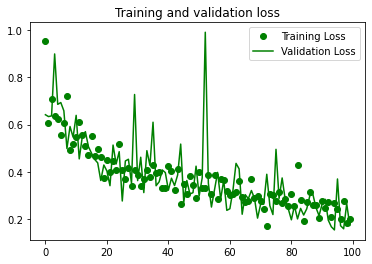

In [84]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'model' is not defined

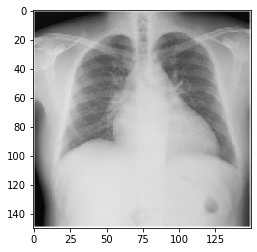

In [4]:
import numpy as np
# from google.colab import files
from keras.preprocessing import image

img=image.load_img('3.png', target_size=(150, 150))
plt.imshow(img)

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0]>0.5:
    print(" is a normal.")
else:
    print(" is a abnormal.")

In [98]:
print(classes)

[[1.]]


In [3]:
import numpy as np
import random
from sklearn.neighbors import NearestNeighbors
import math
from random import randint
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

class Smote(object):
	"""docstring for Smote"""

	def __init__(self,distance):
		super(Smote, self).__init__()
		self.synthetic_arr=  []
		self.newindex = 0
		self.distance_measure = distance



	def Populate(self,N,i,indices,min_samples,k):
		"""
    		Populates the synthitic array


    		Returns:Synthetic Array to generate_syntheic_points 
    	"""

		while N!=0:
			arr = []
			nn = randint(0,k-2)
			features = len(min_samples[0])
			
			for attr in range(features):
				diff = min_samples[indices[nn]][attr] - min_samples[i][attr]
				gap = random.uniform(0,1)
				arr.append(min_samples[i][attr] + gap*diff)
			
			self.synthetic_arr.append(arr)
			self.newindex = self.newindex + 1
			N = N-1



	def k_neighbors(self,euclid_distance,k):
		nearest_idx_npy = np.empty([euclid_distance.shape[0],euclid_distance.shape[0]],dtype=np.int64)
		
		for i in range(len(euclid_distance)):
			idx = np.argsort(euclid_distance[i])
			nearest_idx_npy[i] = idx
			idx = 0

		return nearest_idx_npy[:,1:k]




	def find_k(self,X,k):

		"""
   			Finds k nearest neighbors using euclidian distance

   			Returns: The k nearest neighbor   
    	"""




		euclid_distance = np.empty([X.shape[0],X.shape[0]],dtype = np.float32)
		
		for i in range(len(X)):
			dist_arr = []
			for j in range(len(X)):
				dist_arr.append(math.sqrt(sum((X[j]-X[i])**2)))
			dist_arr = np.asarray(dist_arr,dtype = np.float32)
			euclid_distance[i] = dist_arr

		return self.k_neighbors(euclid_distance,k)






	def generate_synthetic_points(self,min_samples,N,k):

		"""
    		Returns (N/100) * n_minority_samples synthetic minority samples.
    		Parameters
    		----------
    		min_samples : Numpy_array-like, shape = [n_minority_samples, n_features]
    		    Holds the minority samples
    		N : percetange of new synthetic samples: 
    		    n_synthetic_samples = N/100 * n_minority_samples. Can be < 100.
    		k : int. Number of nearest neighbours. 
    		Returns
    		-------
    		S : Synthetic samples. array, 
    		    shape = [(N/100) * n_minority_samples, n_features]. 
    	"""
		

		if N < 100:
			raise ValueError("Value of N cannot be less than 100%")

		if self.distance_measure not in ('euclidian','ball_tree'):
			raise ValueError("Invalid Distance Measure.You can use only Euclidian or ball_tree")


		if k>min_samples.shape[0]:
			raise ValueError("Size of k cannot exceed the number of samples.")

		
		N = int(N/100)
		T = min_samples.shape[0]
		
		

		if self.distance_measure == 'euclidian':
				indices = self.find_k(min_samples,k)
			
		elif self.distance_measure=='ball_tree':
			nb = NearestNeighbors(n_neighbors = k,algorithm= 'ball_tree').fit(min_samples)
			distance,indices = nb.kneighbors(min_samples)
			indices = indices[:,1:]	



		for i in range(indices.shape[0]):
			self.Populate(N,i,indices[i],min_samples,k)
		
		return np.asarray(self.synthetic_arr)

		


	def plot_synthetic_points(self,min_samples,N,k):
		"""

			Plot the over sampled synthtic samples in a scatterplot



		"""


		if N < 100:
			raise ValueError("Value of N cannot be less than 100%")

		if self.distance_measure not in ('euclidian','ball_tree'):
			raise ValueError("Invalid Distance Measure.You can use only Euclidian or ball_tree")


		if k>min_samples.shape[0]:
			raise ValueError("Size of k cannot exceed the number of samples.")

		
		synthetic_points = self.generate_synthetic_points(min_samples,N,k)
		
		pca = PCA(n_components=2)
		pca.fit(synthetic_points)
		pca_synthetic_points = pca.transform(synthetic_points)
		
		plt.scatter(pca_synthetic_points[:,0],pca_synthetic_points[:,1])
		plt.show()

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [89]:
img_size = 64, 64

transform = transforms.Compose(
    [transforms.Resize(img_size),transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4


trainset = torchvision.datasets.ImageFolder(root='./xray_data', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(root='./xray_data', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('normal', 'cardiomegaly')

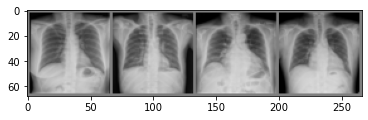

normal cardiomegaly cardiomegaly cardiomegaly


In [90]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [94]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(2704, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 배치를 제외한 모든 차원을 평탄화(flatten)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=2704, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [95]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [96]:
for epoch in range(3):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 1.107
[1,   400] loss: 0.616
[1,   600] loss: 0.556
[2,   200] loss: 0.482
[2,   400] loss: 0.495
[2,   600] loss: 0.498
[3,   200] loss: 0.466
[3,   400] loss: 0.431
[3,   600] loss: 0.409
Finished Training


In [97]:
PATH = './test_net.pth'
torch.save(net.state_dict(), PATH)

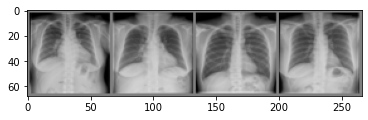

GroundTruth:  normal normal normal normal


In [98]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [99]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [100]:
outputs = net(images)

In [101]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  normal normal normal normal


In [102]:
correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = net(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 83 %


In [103]:
# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class normal is: 92.5 %
Accuracy for class cardiomegaly is: 63.2 %


In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# CUDA 기기가 존재한다면, 아래 코드가 CUDA 장치를 출력합니다:

print(device)

cpu


In [13]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [14]:
inputs, labels = data[0].to(device), data[1].to(device)